<a href="https://colab.research.google.com/github/spdkh/DataMining-Course-8118/blob/master/Parisa_Daj_COMP8118_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import os
import sys
import shutil
from google.colab import files

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.spatial.distance import squareform


In [145]:
# upload images
uploaded = files.upload()

Saving test.dat to test (6).dat


In [146]:
lines = str(uploaded['test.dat'])[2:-1].replace('\\r', '').split('\\n')
lines

['16 2 2 5',
 '15 10',
 '3 10',
 '15 12',
 '3 14',
 '18 13',
 '1 7',
 '10 1',
 '10 30',
 '15 12',
 '3 11',
 '14 12',
 '3 13',
 '17 13',
 '2 7',
 '8 1',
 '10 28']

In [147]:
data = [line.split() for line in lines]

In [203]:
def spdkh_kmeans(x, k, centroid):
    print('Initial Centroid:')
    print(centroid)
    print()

    x = x.T
    old_centroid = np.zeros((k, 2))
    i = 1
    while i <= 20:
        if (np.array([centroid == old_centroid])).all():
            break
        
        print('\n' + '\t' * 5 + '#' * 25)
        print('\t' * 7 + "Iteration", i)
        i += 1
        print('\t' * 5 + '#' * 25)

        c_dist = np.zeros((k, np.shape(x)[0], 1))
        clusters = [0] * k
        
        empty_ids = []
        plt.scatter(x.T[0], x.T[1], color="black")
        
        for c in range(k):
            plt.plot(centroid[c][0], centroid[c][1], marker="o", markersize=15, markeredgecolor="red")
            c_dist[c] = cdist(x, [centroid[c]], metric='euclidean')
            # print("\nDistance of x with centroid", c + 1)
            # print(c_dist[c])
        # print()
        c_ids = np.argpartition(c_dist.T, k - 1).T
        old_centroid = centroid.copy()
        sses = [0] * k
        for c in range(k):
            
            condition = np.squeeze(c_ids[c] == 0)
            clusters[c] = np.array(x[condition].tolist())
            
            print('Cluster', c)
            print(clusters[c].T)
            print()

            if clusters[c] != []:
                plt.scatter(clusters[c].T[0], clusters[c].T[1])
            else:
                empty_ids.append(c)
                continue
                
            centroid[c] = np.mean(clusters[c], 0)   
            errors = cdist(clusters[c], [centroid[c]], metric='euclidean')
            # print('errors', errors)
            sses[c] = list(sum([error ** 2 for error in errors]))

        k -= len(empty_ids)

        centroid = np.delete(centroid, [empty_ids], axis=0)
        
        plt.grid(True)
        if np.shape(x)[1] != 2:
            plt.close()
        else: 
            plt.show()

        print("\nUpdated centroid")
        print(centroid)
    
    return sses
 

n, m, k min, k max: 16 2 2 5

input data points:
 [[15.  3. 15.  3. 18.  1. 10. 10. 15.  3. 14.  3. 17.  2.  8. 10.]
 [10. 10. 12. 14. 13.  7.  1. 30. 12. 11. 12. 13. 13.  7.  1. 28.]]


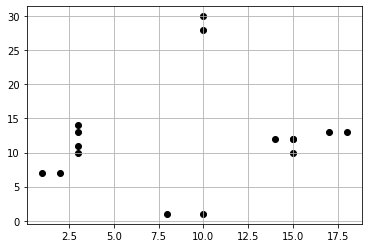


______________________________________________________________________

							K = 2
______________________________________________________________________

Initial Centroid:
[[17. 13.]
 [10.  1.]]


					#########################
							Iteration 1
					#########################
Cluster 0
[[15. 15.  3. 18. 10. 15. 14. 17. 10.]
 [10. 12. 14. 13. 30. 12. 12. 13. 28.]]

Cluster 1
[[ 3.  1. 10.  3.  3.  2.  8.]
 [10.  7.  1. 11. 13.  7.  1.]]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


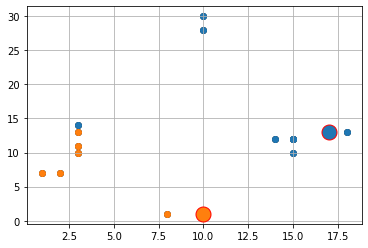


Updated centroid
[[13.         16.        ]
 [ 4.28571429  7.14285714]]

					#########################
							Iteration 2
					#########################
Cluster 0
[[15. 15. 18. 10. 15. 14. 17. 10.]
 [10. 12. 13. 30. 12. 12. 13. 28.]]

Cluster 1
[[ 3.  3.  1. 10.  3.  3.  2.  8.]
 [10. 14.  7.  1. 11. 13.  7.  1.]]



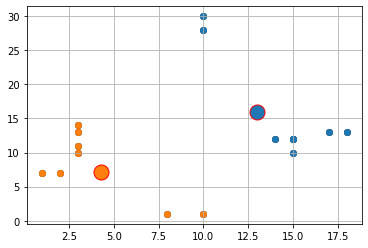


Updated centroid
[[14.25  16.25 ]
 [ 4.125  8.   ]]

					#########################
							Iteration 3
					#########################
Cluster 0
[[15. 15. 18. 10. 15. 14. 17. 10.]
 [10. 12. 13. 30. 12. 12. 13. 28.]]

Cluster 1
[[ 3.  3.  1. 10.  3.  3.  2.  8.]
 [10. 14.  7.  1. 11. 13.  7.  1.]]



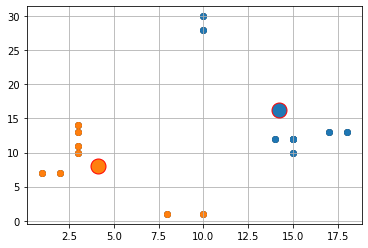


Updated centroid
[[14.25  16.25 ]
 [ 4.125  8.   ]]

______________________________________________________________________

							K = 3
______________________________________________________________________

Initial Centroid:
[[10. 28.]
 [ 3. 14.]
 [10.  1.]]


					#########################
							Iteration 1
					#########################
Cluster 0
[[10. 10.]
 [30. 28.]]

Cluster 1
[]

Cluster 2
[[15.  3. 15.  3. 18.  1. 10. 15.  3. 14.  3. 17.  2.  8.]
 [10. 10. 12. 14. 13.  7.  1. 12. 11. 12. 13. 13.  7.  1.]]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


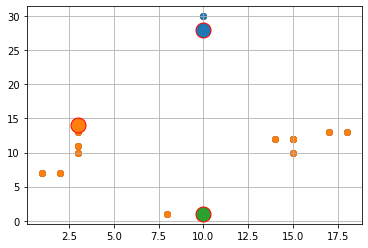


Updated centroid
[[10.         29.        ]
 [ 9.07142857  9.71428571]]

					#########################
							Iteration 2
					#########################
Cluster 0
[[10. 10.]
 [30. 28.]]

Cluster 1
[[15.  3. 15.  3. 18.  1. 10. 15.  3. 14.  3. 17.  2.  8.]
 [10. 10. 12. 14. 13.  7.  1. 12. 11. 12. 13. 13.  7.  1.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


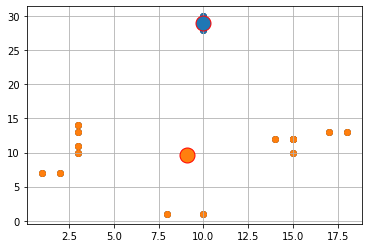


Updated centroid
[[10.         29.        ]
 [ 9.07142857  9.71428571]]

______________________________________________________________________

							K = 4
______________________________________________________________________

Initial Centroid:
[[ 3. 10.]
 [ 2.  7.]
 [ 8.  1.]
 [ 1.  7.]]


					#########################
							Iteration 1
					#########################
Cluster 0
[[15.  3. 15.  3. 18.  1. 10. 15.  3. 14.  3. 17.  2. 10.]
 [10. 10. 12. 14. 13.  7. 30. 12. 11. 12. 13. 13.  7. 28.]]

Cluster 1
[]

Cluster 2
[]

Cluster 3
[[10.  8.]
 [ 1.  1.]]



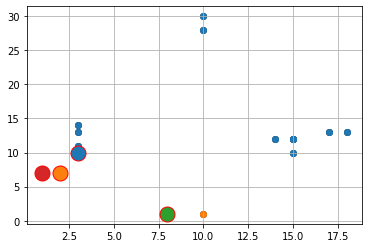


Updated centroid
[[ 9.21428571 13.71428571]
 [ 9.          1.        ]]

					#########################
							Iteration 2
					#########################
Cluster 0
[[15.  3. 15.  3. 18. 10. 15.  3. 14.  3. 17. 10.]
 [10. 10. 12. 14. 13. 30. 12. 11. 12. 13. 13. 28.]]

Cluster 1
[[ 1. 10.  2.  8.]
 [ 7.  1.  7.  1.]]



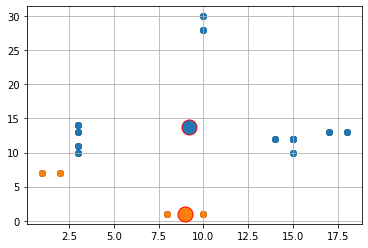


Updated centroid
[[10.5        14.83333333]
 [ 5.25        4.        ]]

					#########################
							Iteration 3
					#########################
Cluster 0
[[15. 15.  3. 18. 10. 15. 14.  3. 17. 10.]
 [10. 12. 14. 13. 30. 12. 12. 13. 13. 28.]]

Cluster 1
[[ 3.  1. 10.  3.  2.  8.]
 [10.  7.  1. 11.  7.  1.]]



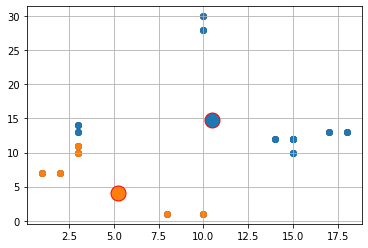


Updated centroid
[[12.         15.7       ]
 [ 4.5         6.16666667]]

					#########################
							Iteration 4
					#########################
Cluster 0
[[15. 15. 18. 10. 15. 14. 17. 10.]
 [10. 12. 13. 30. 12. 12. 13. 28.]]

Cluster 1
[[ 3.  3.  1. 10.  3.  3.  2.  8.]
 [10. 14.  7.  1. 11. 13.  7.  1.]]



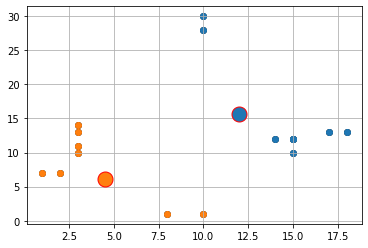


Updated centroid
[[14.25  16.25 ]
 [ 4.125  8.   ]]

					#########################
							Iteration 5
					#########################
Cluster 0
[[15. 15. 18. 10. 15. 14. 17. 10.]
 [10. 12. 13. 30. 12. 12. 13. 28.]]

Cluster 1
[[ 3.  3.  1. 10.  3.  3.  2.  8.]
 [10. 14.  7.  1. 11. 13.  7.  1.]]



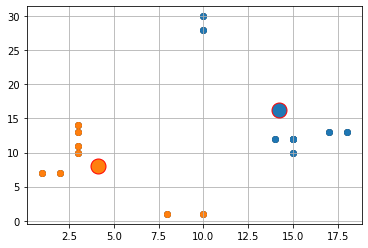


Updated centroid
[[14.25  16.25 ]
 [ 4.125  8.   ]]

______________________________________________________________________

							K = 5
______________________________________________________________________

Initial Centroid:
[[ 1.  7.]
 [ 3. 14.]
 [ 3. 11.]
 [ 2.  7.]
 [14. 12.]]


					#########################
							Iteration 1
					#########################
Cluster 0
[[ 3.  3.  1. 10.  3.  3.  2.  8.]
 [10. 14.  7.  1. 11. 13.  7.  1.]]

Cluster 1
[]

Cluster 2
[]

Cluster 3
[]

Cluster 4
[[15. 15. 18. 10. 15. 14. 17. 10.]
 [10. 12. 13. 30. 12. 12. 13. 28.]]



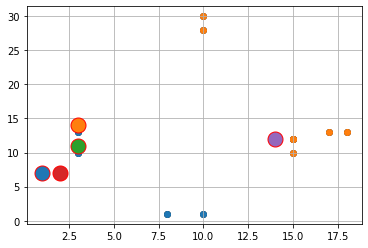


Updated centroid
[[ 4.125  8.   ]
 [14.25  16.25 ]]

					#########################
							Iteration 2
					#########################
Cluster 0
[[ 3.  3.  1. 10.  3.  3.  2.  8.]
 [10. 14.  7.  1. 11. 13.  7.  1.]]

Cluster 1
[[15. 15. 18. 10. 15. 14. 17. 10.]
 [10. 12. 13. 30. 12. 12. 13. 28.]]



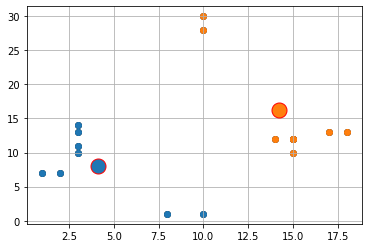


Updated centroid
[[ 4.125  8.   ]
 [14.25  16.25 ]]
SSE: {2: [[501.0], [242.875]], 3: [[2.0], [771.7857142857144]], 4: [[501.0], [242.875]], 5: [[242.875], [501.0]]}


In [204]:
def spdkh_c2(data):
    n, m, k_min, k_max = list(map(int, data[0]))
    print('n, m, k min, k max:', n, m, k_min, k_max)

    x = np.array(data[1:], dtype=float)
    print('\ninput data points:\n', x.T)

    plt.scatter(x.T[0], x.T[1], color="black")
    plt.grid(True)
    if m != 2:
        plt.close()
    else:
        plt.show()

    sse = dict()
    if m < 3:
        x_new = x

    for k in range(k_min, k_max + 1):
        print('\n' + '_' * 70)
        print()
        print('\t' * 7 + 'K =', k)
        print('_' * 70)
        print()

        centroid_ids = np.random.choice(n, k, replace=False)
        centroids = x[centroid_ids]
        sse[k] = spdkh_kmeans(x_new.T, k, centroids)
    print("SSE:", sse)
    return sse

SSE = spdkh_c2(data)

In [205]:
SSE

{2: [[501.0], [242.875]],
 3: [[2.0], [771.7857142857144]],
 4: [[501.0], [242.875]],
 5: [[242.875], [501.0]]}

2 501.0 242.875 
3 2.0 771.7857142857144 
4 501.0 242.875 
5 242.875 501.0 


In [216]:
stdoutOrigin=sys.stdout 
sys.stdout = open("test.res", "w")
for k, sses in SSE.items(): 
    print(k, end=' ')
    for sse in sses:
        print(sse[0], end=' ')
    print()
sys.stdout.close()
sys.stdout=stdoutOrigin
